# Clustering using Digits dataset

### Loading libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale

### Setting the random seed

In [2]:
np.random.seed(30)

### Loading digits dataset

In [3]:
digits = datasets.load_digits()

### Splitting our dataset

Using a test size of 40% and a traing set of 60%

In [4]:
X_train, X_test, y_train, y_test= train_test_split(digits.data,digits.target, test_size=0.4)
x = digits.data
y = digits.target

In [5]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(dataset, init_cluster='k-means++', tolerance=0.0001,loops=10,max_iterations=10,
                    jobs=16):

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=jobs)

        # Calculate Kmeans
        kmeans.fit(dataset)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

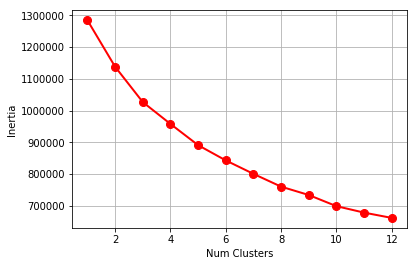

In [6]:
select_clusters(dataset = X_train,loops = 12)

Using the knob techinque it is not possible to tell how many clusters our sample 

In [7]:
model = KMeans(n_clusters=10,random_state=30)
model.fit(x)
x_predict = model.fit_predict(x)
x_transform = model.fit_transform(x)

In [8]:
print(metrics.accuracy_score(y, x_predict))
print(metrics.confusion_matrix(y, x_predict))

0.10573177518085698
[[  0   0   0   1 177   0   0   0   0   0]
 [ 24   0  55   0   0  99   2   1   1   0]
 [148   2   2   0   1   8   0  13   0   3]
 [  0  13   0   0   0   7   0 154   2   7]
 [  0   0   5 164   0   3   0   0   0   9]
 [  0  43   0   2   0   0   1   0 136   0]
 [  0   0   1   0   1   2 177   0   0   0]
 [  0   0   2   0   0   2   0   0   0 175]
 [  3  52   6   0   0 100   2   2   4   5]
 [  0 139  20   0   0   2   0   6   6   7]]
